In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [34]:
!curl -O https://raw.githubusercontent.com/CSAILVision/ADE20K/main/dataset/ADE20K_2021_17_01/images/ADE/training/urban/street/ADE_train_00016869.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1079k  100 1079k    0     0  1526k      0 --:--:-- --:--:-- --:--:-- 1524k


In [13]:
im = cv2.imread('ADE_train_00016869.jpg')

In [43]:
################################################################################
# Convert to gray, blur, get contours, get canny.
def gray_blur_canny_contours(im, blur_kernel=(3,3), cannythresh1=100, cannythresh2=200):
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.blur(im_gray, (3,3))
    ret, thresh = cv2.threshold(im_gray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    canny_output = cv2.Canny(im_gray, cannythresh1, cannythresh2)
    contours_output = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    for i in range(len(contours)):
        color = (randint(0,256), randint(0,256), randint(0,256))
        cv2.drawContours(contours_output, contours, i, color, 2, cv2.LINE_8, hierarchy, 0)
    return im_gray, canny_output, contours_output, contours

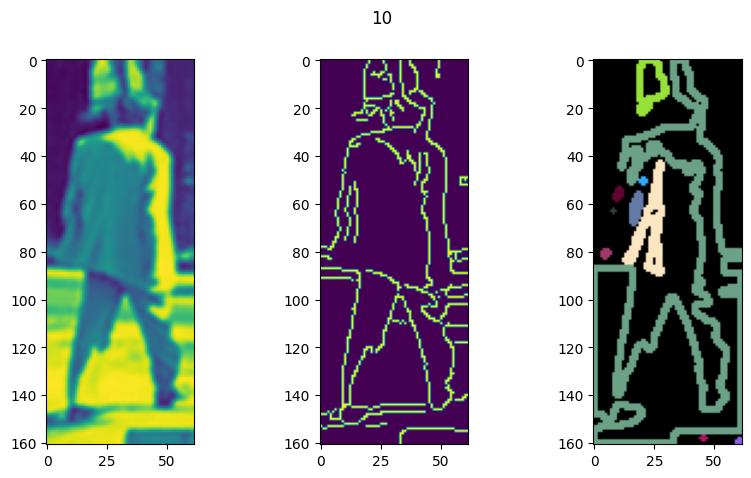

In [10]:
im_gray, canny_output, contours_output, contours = gray_blur_canny_contours(
    im=im[845:1006, 554:616],
    blur_kernel=(3,3),
    cannythresh1=100,
    cannythresh2=200
)
fig, ax = plt.subplots(1, 3, figsize=(10,5))
fig.suptitle(len(contours))
ax[0].imshow(im_gray)
ax[1].imshow(canny_output)
ax[2].imshow(contours_output)
plt.show()

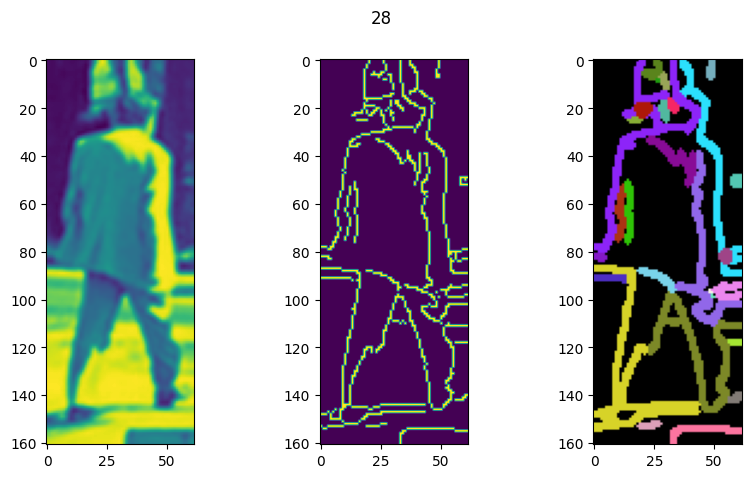

In [42]:
blur_kernel=(3,3)
cannythresh1=100
cannythresh2=200

im_gray = cv2.cvtColor(im[845:1006, 554:616], cv2.COLOR_BGR2GRAY)
im_gray = cv2.blur(im_gray, (3,3))
#im_gray = cv2.bilateralFilter(im_gray,7,40,40)

canny_output = cv2.Canny(im_gray, cannythresh1, cannythresh2)
# dilatation_size = 1
# element = cv2.getStructuringElement(
#     cv2.MORPH_RECT,
#     (2 * dilatation_size + 1, 2 * dilatation_size + 1),
#     (dilatation_size, dilatation_size)
# )
# canny_output = cv2.dilate(canny_output, element)

ret, thresh = cv2.threshold(canny_output, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
contours_output = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (randint(0,256), randint(0,256), randint(0,256))
    cv2.drawContours(contours_output, contours, i, color, 2, cv2.LINE_8, hierarchy, 0)

fig, ax = plt.subplots(1, 3, figsize=(10,5))
fig.suptitle(len(contours))
ax[0].imshow(im_gray)
ax[1].imshow(canny_output)
ax[2].imshow(contours_output)
plt.show()